In [4]:
%load_ext IPython.extensions.autoreload
%autoreload 2

The IPython.extensions.autoreload extension is already loaded. To reload it, use:
  %reload_ext IPython.extensions.autoreload


In [ ]:
import sys
sys.path.append('../..')
from model import FinData
from model import merged_split
from model import CatboostFinModel
from model import train_valid_test_split
from model import test_average_return
from datetime import datetime

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#### Посмотрим среднюю волатильность разных акций по часам + построим графики для разных компаний типо барплотов средняя волатильность по часам за год-полгода + комиссия 

In [9]:
data = FinData("../../datasets/Sber_10_min.csv")

Посмотрим, как с этим заданием справится мой первый помощник 

In [10]:
data.restrict_time_down(datetime(2024, 1, 1))
data.restrict_time_up(datetime(2024, 12, 31))
df = data.df

In [14]:
def vis_volatility(comm_value, df):
    # Значение комиссии
    comission = comm_value * 2  # в процентах

    # Преобразуем utc в datetime и добавим столбец часов
    df['utc'] = pd.to_datetime(df['utc'])
    df['hour'] = df['utc'].dt.hour

    # Рассчитываем процентную разницу между close_t и close_{t+1}
    df['close_shifted'] = df['close'].shift(-1)
    # тут процентная волатильность от среднего 
    df['volatility'] = (df['close_shifted'] - df['close']).abs() / ((df['close_shifted'] + df['close']) / 2) * 100

    # Группируем по часам и считаем среднюю волатильность
    hourly_volatility = df.groupby('hour')['volatility'].mean()

    # Визуализация
    plt.figure(figsize=(12, 6))
    plt.bar(hourly_volatility.index, hourly_volatility, color='blue', alpha=0.7, label='Средняя волатильность')
    plt.axhline(y=comission, color='red', linestyle='--', label=f'Комиссия ({comission}%)')
    plt.xlabel('Часы')
    plt.ylabel('Средняя волатильность (%)')
    plt.title('Средняя волатильность по часам')
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

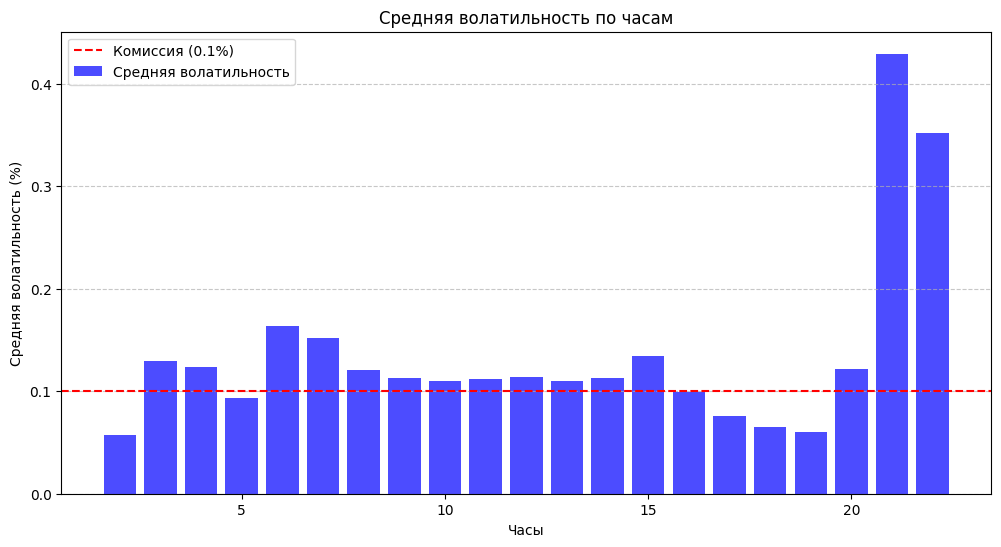

In [15]:
vis_volatility(0.05, data.df)

In [27]:
data = FinData("../../datasets/VTB_10_min.csv")

data.restrict_time_down(datetime(2024, 1, 1))
data.restrict_time_up(datetime(2024, 12, 31))
df = data.df

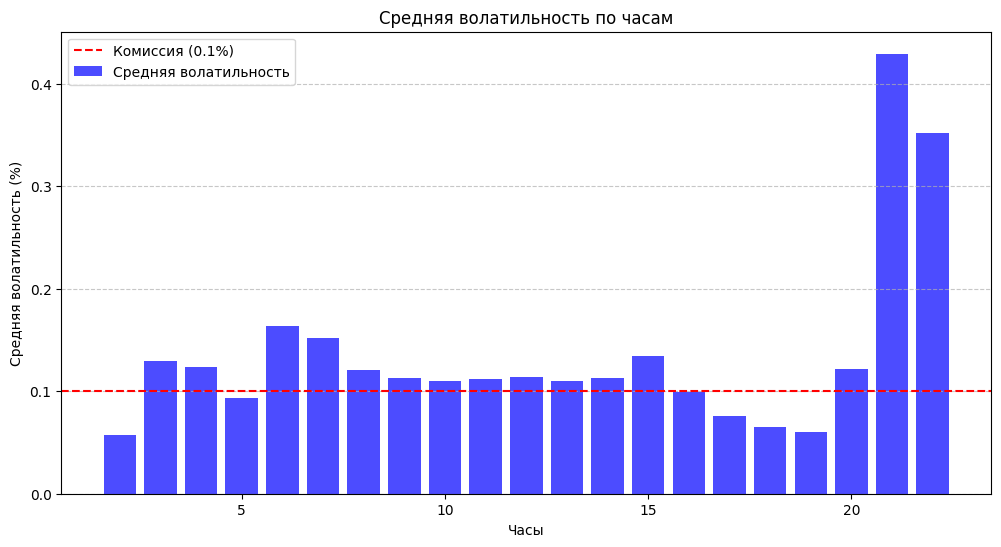

In [25]:
vis_volatility(0.05, data.df)

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def calculate_hourly_volatility(dfs, comm_value, labels=None):
    """
    Рассчитывает среднюю волатильность по часам и строит график для нескольких датафреймов.
    
    :param dfs: список датафреймов
    :param commission: уровень комиссии (float), который будет отображаться на графике
    :param labels: список меток для каждого датафрейма (по умолчанию None)
    """

    commission = comm_value * 2
     

    plt.figure(figsize=(12, 6))
    
    if labels is None:
        labels = [f"Dataset {i+1}" for i in range(len(dfs))]
    
    for df, label in zip(dfs, labels):
        df['hour'] = pd.to_datetime(df['utc']).dt.hour
        # Рассчитываем процентную разницу между close_t и close_{t+1}
        df['close_shifted'] = df['close'].shift(-1)
        # тут процентная волатильность от среднего 
        df['volatility'] = (df['close_shifted'] - df['close']).abs() / ((df['close_shifted'] + df['close']) / 2) * 100
        hourly_volatility = df.groupby('hour')['volatility'].mean()
        sns.barplot(x=hourly_volatility.index, y=hourly_volatility.values, label=label)
    
    plt.axhline(y=commission, color='red', linestyle='--', label='Commission Level')
    plt.xlabel("Hour of the day")
    plt.ylabel("Average Volatility")
    plt.title("Hourly Volatility Across Multiple Datasets")
    plt.legend()
    plt.grid()
    plt.show()

# Пример вызова функции
# dfs = [df1, df2, df3, df4, df5]  # список датафреймов
# calculate_hourly_volatility(dfs, commission=0.002, labels=["Dataset 1", "Dataset 2", "Dataset 3", "Dataset 4", "Dataset 5"])


In [36]:
down_time = datetime(2024, 1, 1)
up_time = datetime(2024, 12, 31)


data_Sber = FinData("../../datasets/Sber_10_min.csv")
data_Sber.restrict_time_down(down_time)
data_Sber.restrict_time_up(up_time)
df_Sber = data_Sber.df


data_Yn = FinData("../../datasets/Yandex_10_min.csv")
data_Yn.restrict_time_down()
data_Yn.restrict_time_up(up_time)
df_Yn = data_Yn.df


data_VTB = FinData("../../datasets/VTB_10_min.csv")
data_VTB.restrict_time_down(down_time)
data_VTB.restrict_time_up(up_time)
df_VTB = data_VTB.df


data_Tatneft = FinData("../../datasets/Tatneft_10_min.csv")
data_Tatneft.restrict_time_down(down_time)
data_Tatneft.restrict_time_up(up_time)
df_Tatneft = data_Tatneft.df

data_Gazprom = FinData("../../datasets/Gazprom_10_min.csv")
data_Gazprom.restrict_time_down(down_time)
data_Gazprom.restrict_time_up(up_time)
df_Gazprom = data_Gazprom.df


dfs = [df_Sber, df_Yn, df_VTB, df_Tatneft, df_Gazprom]
labels = ["Sber", "Yandex", "VTB", "Tatneft", "Gazprom"]

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def calculate_hourly_volatility(dfs, comm_value, labels=None):
    """
    Рассчитывает среднюю волатильность по часам и строит 4 отдельных графика (2x2).
    
    :param dfs: список из 4 датафреймов
    :param comm_value: уровень комиссии (float), который будет отображаться на графике
    :param labels: список меток для каждого датафрейма (по умолчанию None)
    """
    if len(dfs) != 4:
        raise ValueError("Функция ожидает ровно 4 датафрейма.")
    
    commission = comm_value * 2
    fig, axes = plt.subplots(2, 2, figsize=(12, 10), sharey=True)
    axes = axes.flatten()
    
    if labels is None:
        labels = [f"Dataset {i+1}" for i in range(4)]
    
    for i, (df, label) in enumerate(zip(dfs, labels)):
        df['hour'] = pd.to_datetime(df['utc']).dt.hour
        df['close_shifted'] = df['close'].shift(-1)
        df['volatility'] = (df['close_shifted'] - df['close']).abs() / ((df['close_shifted'] + df['close']) / 2) * 100
        hourly_volatility = df.groupby('hour')['volatility'].mean()
        
        sns.barplot(x=hourly_volatility.index, y=hourly_volatility.values, ax=axes[i])
        axes[i].axhline(y=commission, color='red', linestyle='--', label='Commission Level')
        axes[i].set_xlabel("Hour of the day")
        axes[i].set_ylabel("Average Volatility")
        axes[i].set_title(label)
        axes[i].legend()
    
    plt.tight_layout()
    plt.show()

In [44]:
dfs = [df_Sber, df_Yn, df_VTB, df_Tatneft]
labels = ["Sber", "Yandex", "VTB", "Tatneft"]

2025-02-12 12:00:54,745 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-12 12:00:54,753 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-12 12:00:54,854 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-12 12:00:54,861 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-12 12:00:54,934 - INFO - Using categorical units to plot a list of strings that are all parsable as 

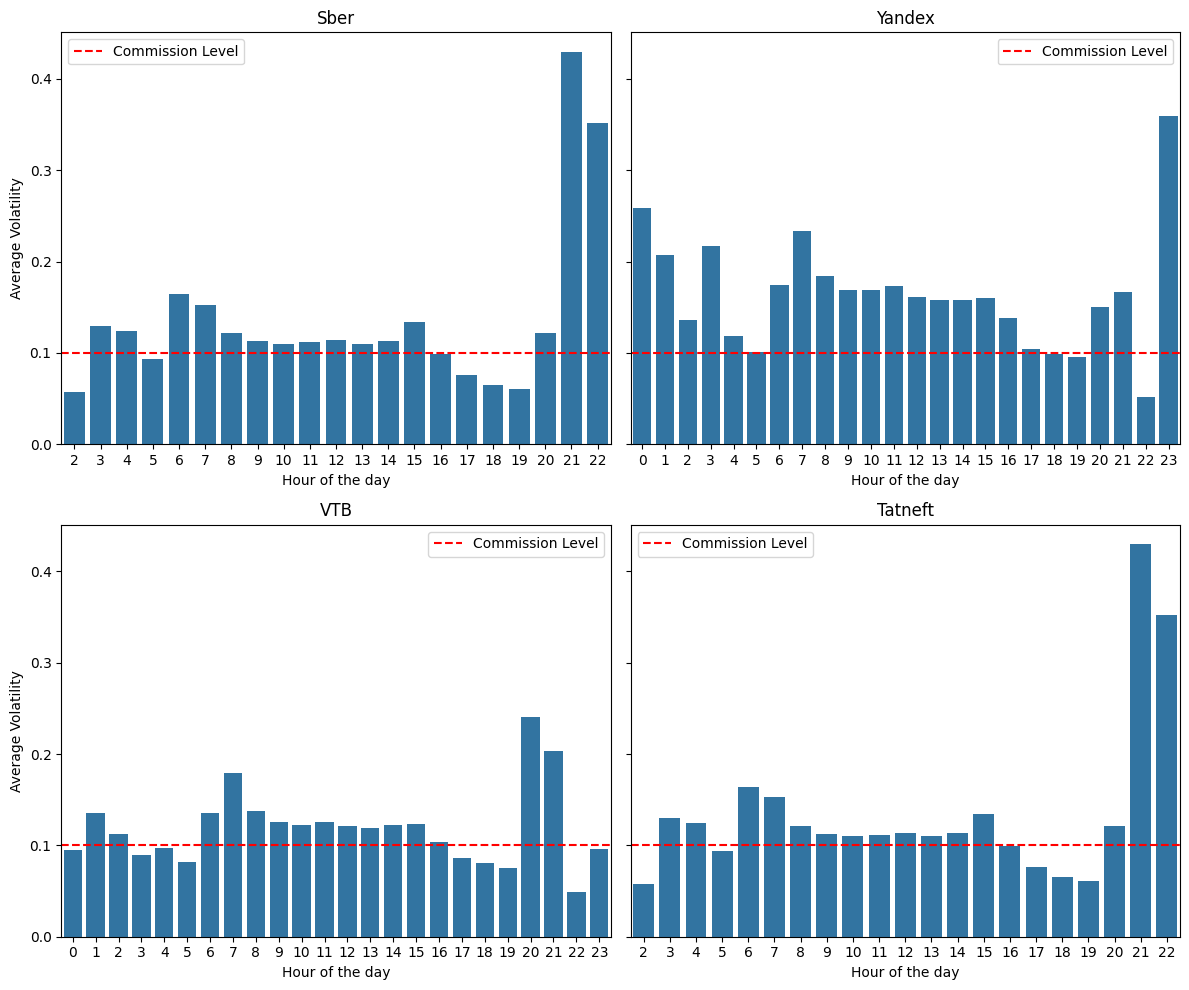

In [45]:
calculate_hourly_volatility(dfs, comm_value=0.05, labels = labels)

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def calculate_hourly_volume(dfs, labels=None):
    """
    Рассчитывает средний объем торгов по часам и строит 4 отдельных графика (2x2).
    
    :param dfs: список из 4 датафреймов
    :param labels: список меток для каждого датафрейма (по умолчанию None)
    """
    if len(dfs) != 4:
        raise ValueError("Функция ожидает ровно 4 датафрейма.")
    
    fig, axes = plt.subplots(2, 2, figsize=(12, 10), sharey=True)
    axes = axes.flatten()
    
    if labels is None:
        labels = [f"Dataset {i+1}" for i in range(4)]
    
    for i, (df, label) in enumerate(zip(dfs, labels)):
        df['hour'] = pd.to_datetime(df['utc']).dt.hour
        hourly_volume = df.groupby('hour')['volume'].mean()
        
        sns.barplot(x=hourly_volume.index, y=hourly_volume.values, ax=axes[i])
        axes[i].set_xlabel("Hour of the day")
        axes[i].set_ylabel("Average Trading Volume")
        axes[i].set_title(label)
    
    plt.tight_layout()
    plt.show()


In [48]:
dfs = [df_Sber, df_Yn, df_Gazprom, df_Tatneft]
labels = ["Sber", "Yandex", "Gazprom", "Tatneft"]

2025-02-12 12:12:26,304 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-12 12:12:26,310 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-12 12:12:26,389 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-12 12:12:26,397 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-12 12:12:26,485 - INFO - Using categorical units to plot a list of strings that are all parsable as 

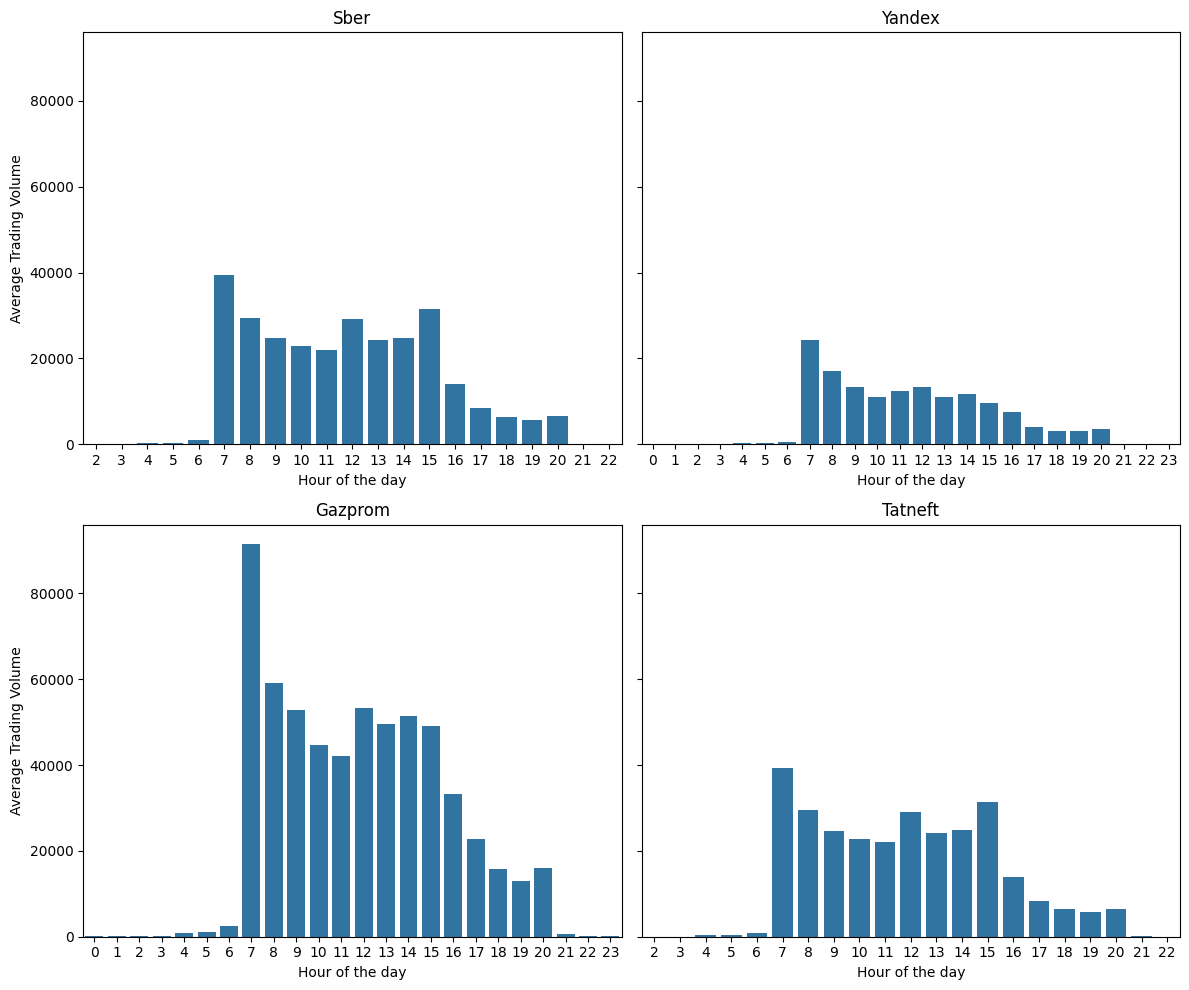

In [52]:
calculate_hourly_volume(dfs, labels = labels)